# <center>The goal of this script is to create a counterfeit detection algorithm<center>

<b> Importing the necessary libraries: <b>

In [41]:
import pandas as pd
import os
os.environ['OMP_NUM_THREADS'] = '1'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from functions import *
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf

# Task 1 - Briefly describe the data at hand with univariate and bivariate analyses

<b> Importing data: <b>

In [42]:
df=pd.read_csv(r"C:\Users\blago\OneDrive\Documents\Openclassrooms\Project 7\notes.csv")

<b> Univariate analysis <b>

In [43]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [45]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


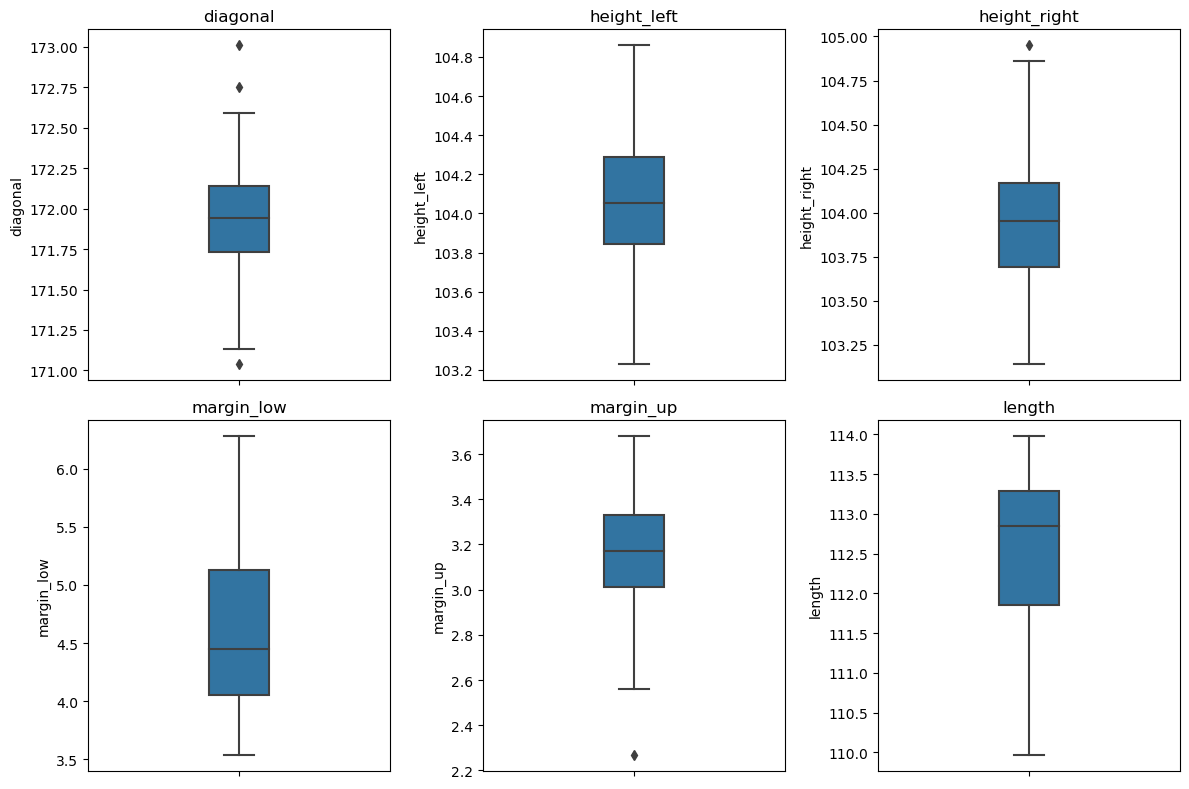

In [46]:
#Selecting only the columns with numeric types from df
columns=df.select_dtypes(include='number').columns

#Creating a figure and subplots
fig, axes=plt.subplots(2, 3, figsize=(12, 8))
axes=axes.flatten()

#Looping through each column and creating a boxplot for each in the subplots
for i, column in enumerate(columns):
    ax=axes[i]
    sns.boxplot(data=df, y=column, width=0.2, ax=ax)
    ax.set_title(column)
    ax.set_xlabel(None)
    
#Adjusting the layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

<b> Bivariate analysis <b>

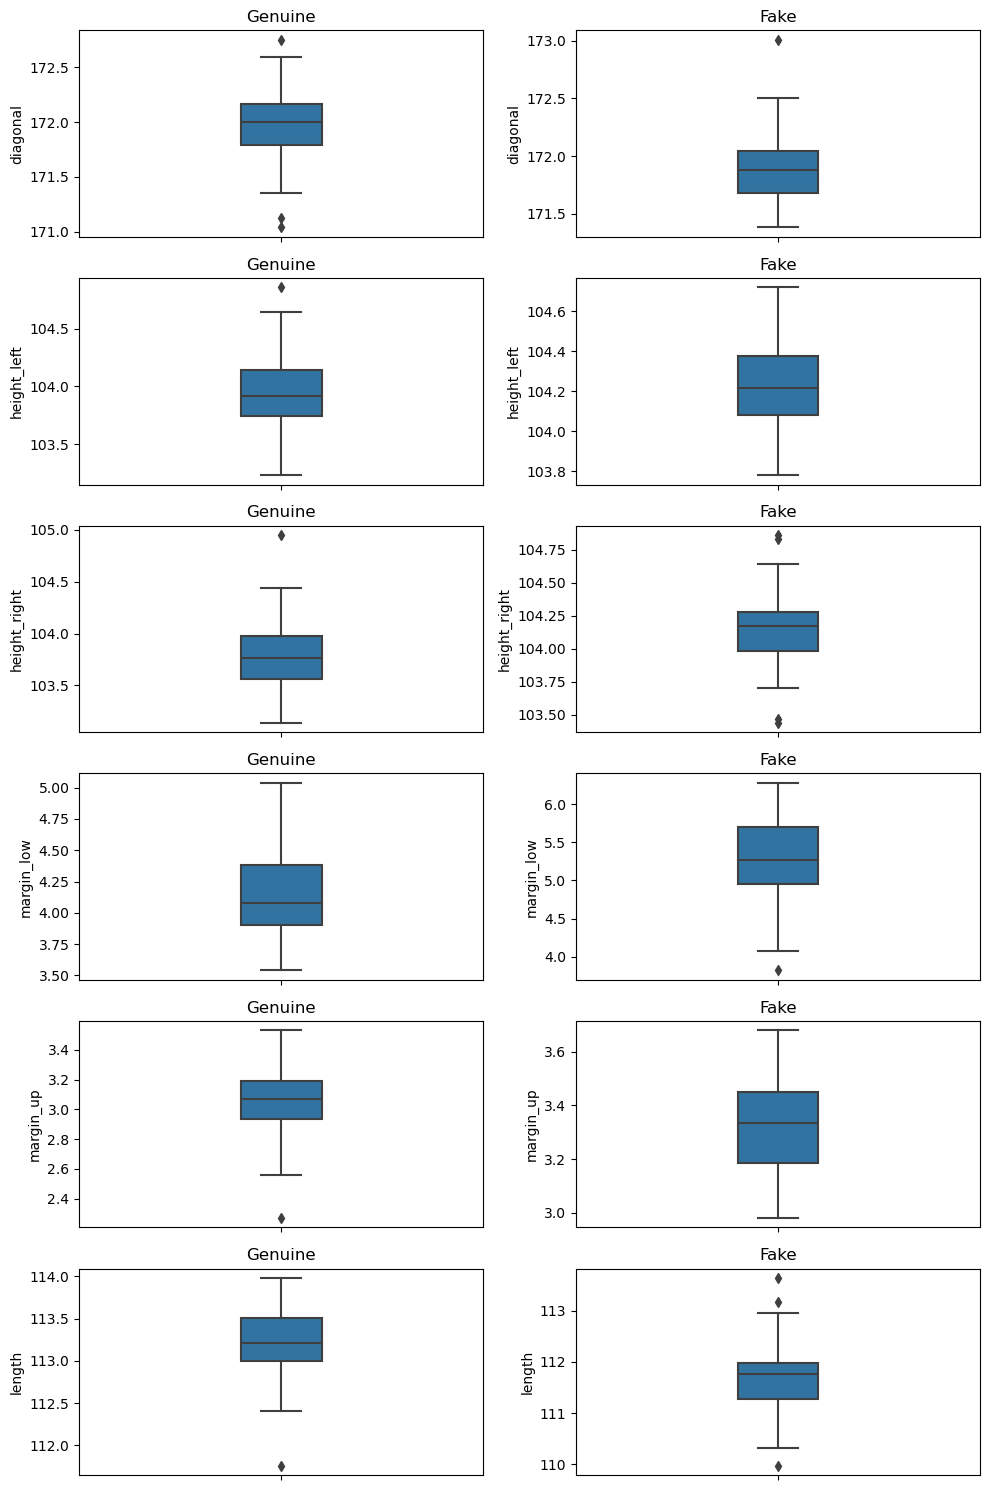

In [50]:
#Filtering the DataFrame to include only rows where 'is_genuine' is True
genuine_df=df[df['is_genuine']]

#Filtering the DataFrame to include only rows where 'is_genuine' is False
fake_df=df[~df['is_genuine']]

#Listing the columns for which we want to create subplots
columns=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

#Number of rows and columns for the subplot grid
rows=len(columns)
cols=2

#Creating the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(10, 15))

#Looping through each column
for i, col in enumerate(columns):
    #Ploting the boxplot for the 'col' column where 'is_genuine' is True
    sns.boxplot(data=genuine_df, y=col, width=0.2, ax=axes[i, 0])
    axes[i, 0].set_title('Genuine')
    
    #Ploting the boxplot for the 'col' column where 'is_genuine' is False
    sns.boxplot(data=fake_df, y=col, width=0.2, ax=axes[i, 1])
    axes[i, 1].set_title('Fake')

plt.tight_layout()
plt.show()

<b> Pair plotting in order to see the correlations between each variable

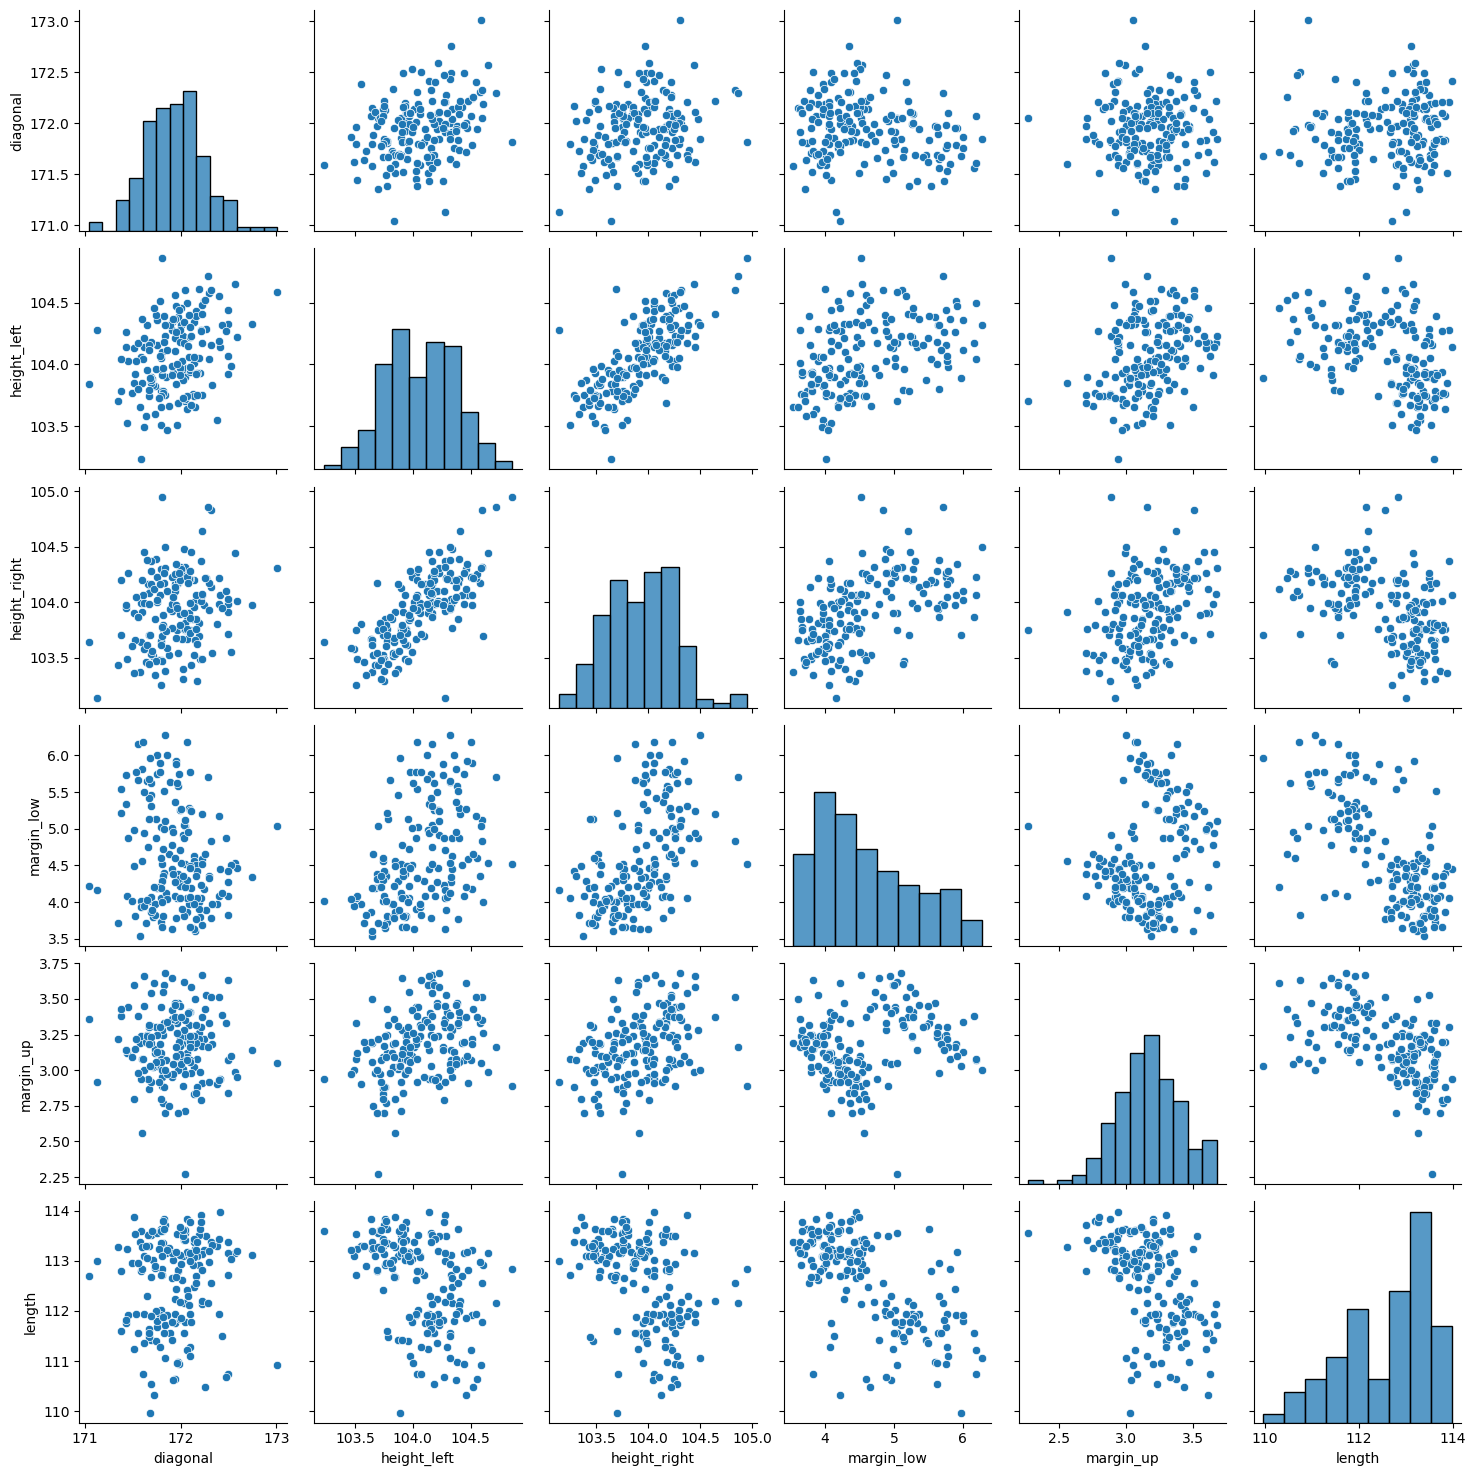

In [53]:
only_numerical=df.select_dtypes(include='number')

sns.pairplot(only_numerical)

<b> Heat map so we can visualize the values of those correlations:

<Axes: >

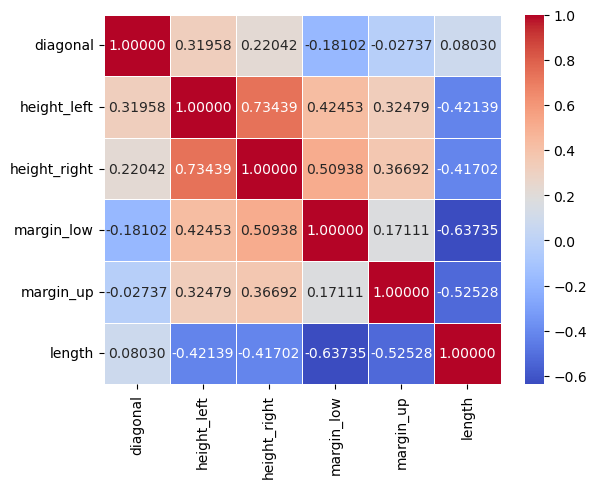

In [54]:
correlation_matrix=only_numerical.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".5f", linewidth=.5, cmap='coolwarm')

# Task 2 - Carry out a principal component analysis of the sample

In [58]:
#Standardizing
on_means=only_numerical.mean()
on_std=only_numerical.std()

scaled_data=(only_numerical-on_means)/on_std

scaled_df=pd.DataFrame(scaled_data, columns=only_numerical.columns)

scaled_df.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.427082,2.661591,3.087442,-0.131203,-1.186369,0.280804
1,-0.884945,-1.094464,-0.689218,-0.857592,-1.270985,0.778398
2,-0.361673,-1.027391,-0.507939,-0.302118,-1.228677,1.373347
3,-0.459787,-0.960319,-0.840285,-1.256394,-0.213283,1.146185
4,0.357826,-1.228609,-0.538152,0.609430,-3.809471,1.059647


<Axes: ylabel='Density'>

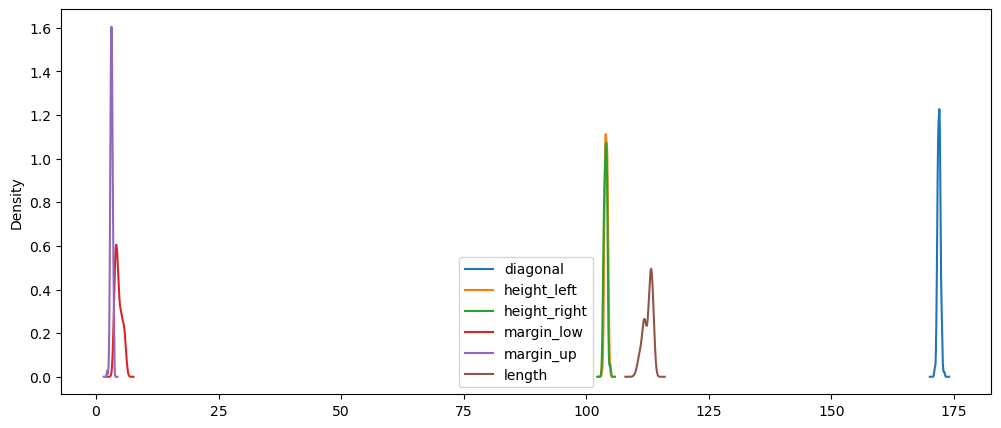

In [59]:
#before standardizing
pd.DataFrame(df,columns=df.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

<Axes: ylabel='Density'>

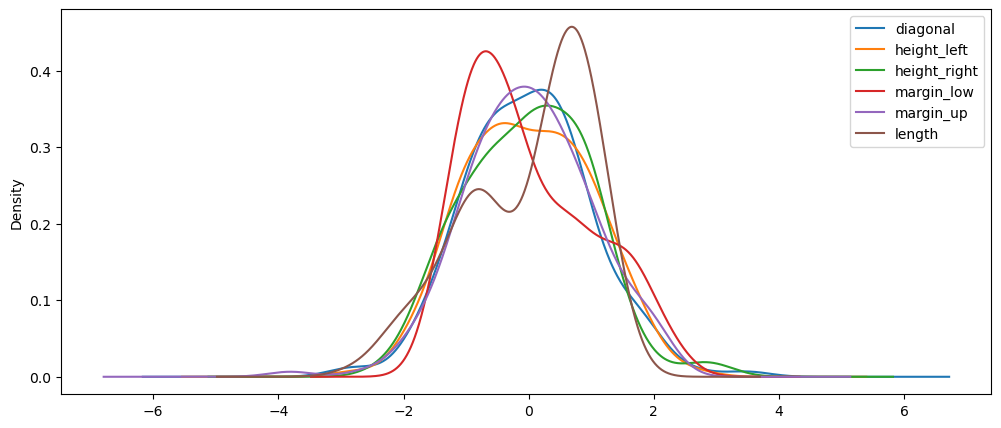

In [60]:
#after standardizing
pd.DataFrame(scaled_df,columns=scaled_df.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

In [61]:
pca=PCA()
#pca=PCA(n_components=num_components) I dont need this cuz I can just keep all elements
principal_components=pca.fit_transform(scaled_df)

In [62]:
pca.explained_variance_ratio_

array([0.47447921, 0.21957106, 0.14234524, 0.08526295, 0.04612822,
       0.03221331])

In [64]:
#This code's purpose is to decide how many components to keep for the PCA, 
#but as we only have 6 factors, we keep all of them in the end
explained_variance_ratio=pca.explained_variance_ratio_

cumulative_variance=np.cumsum(explained_variance_ratio)
num_components=np.argmax(cumulative_variance >= 0.80) + 1

print(f"Number of components for 80% variance: {num_components}")

Number of components for 80% variance: 3


<b> Analyzing eigenvalues scree plot. <b>

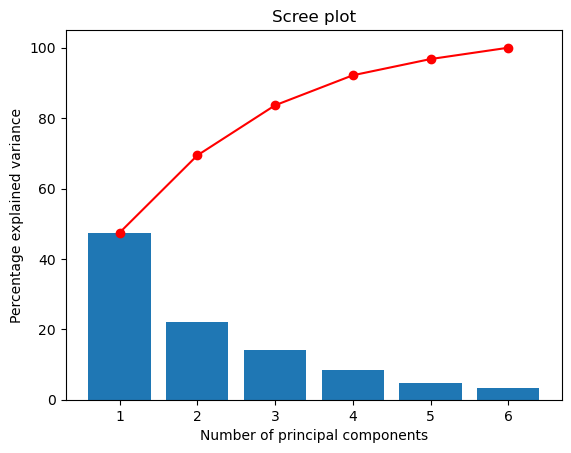

In [65]:
display_scree_plot(pca)

<b> Representing variables using correlation circles.

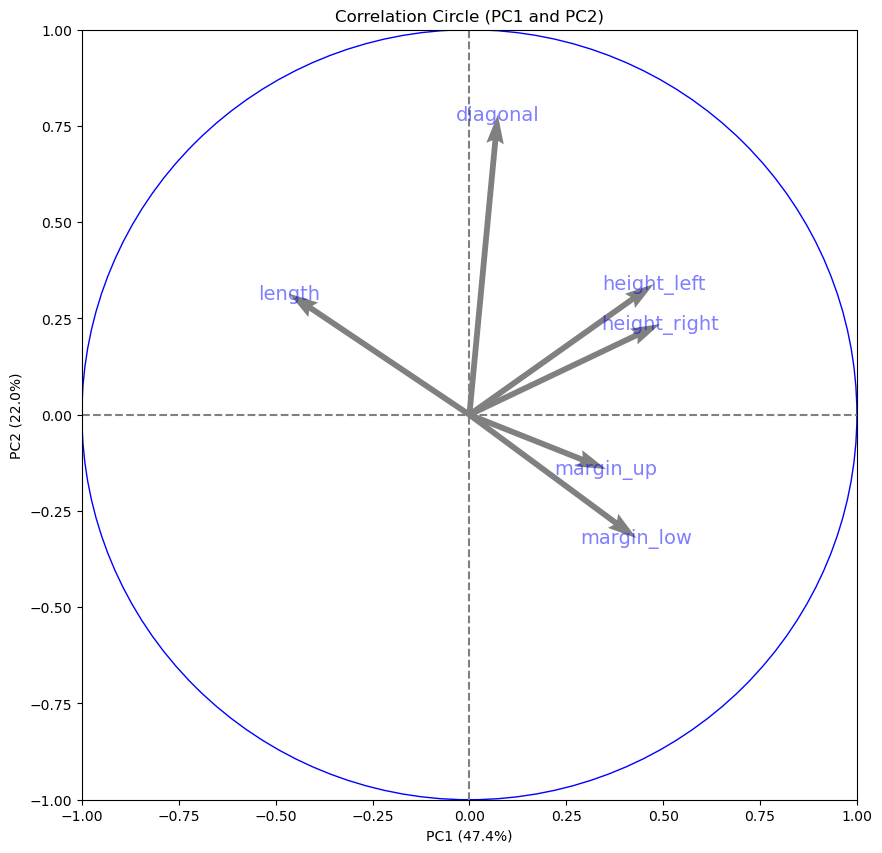

In [66]:
pcs=pca.components_ 
display_circles(pcs, 6, pca, [(0,1)], labels=np.array(scaled_df.columns),)

<b> Representing individuals using factorial planes.

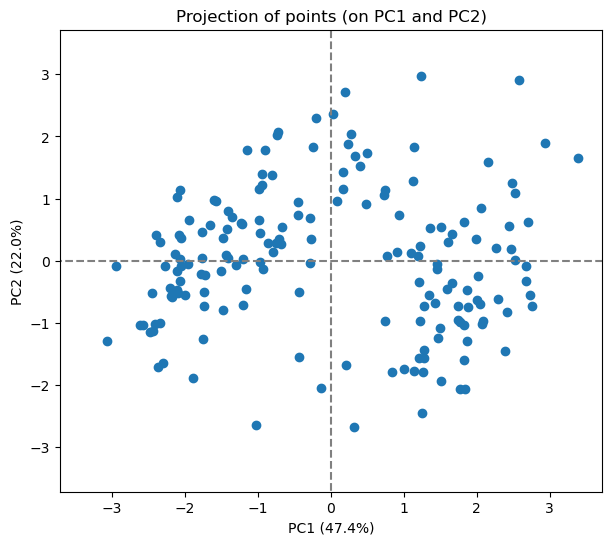

In [77]:
projected_df=pca.transform(scaled_df)
display_factorial_planes(projected_df, 3, pca, [(0,1)])
plt.show()

# Task 3 - Apply a classification algorithm and analyze the result

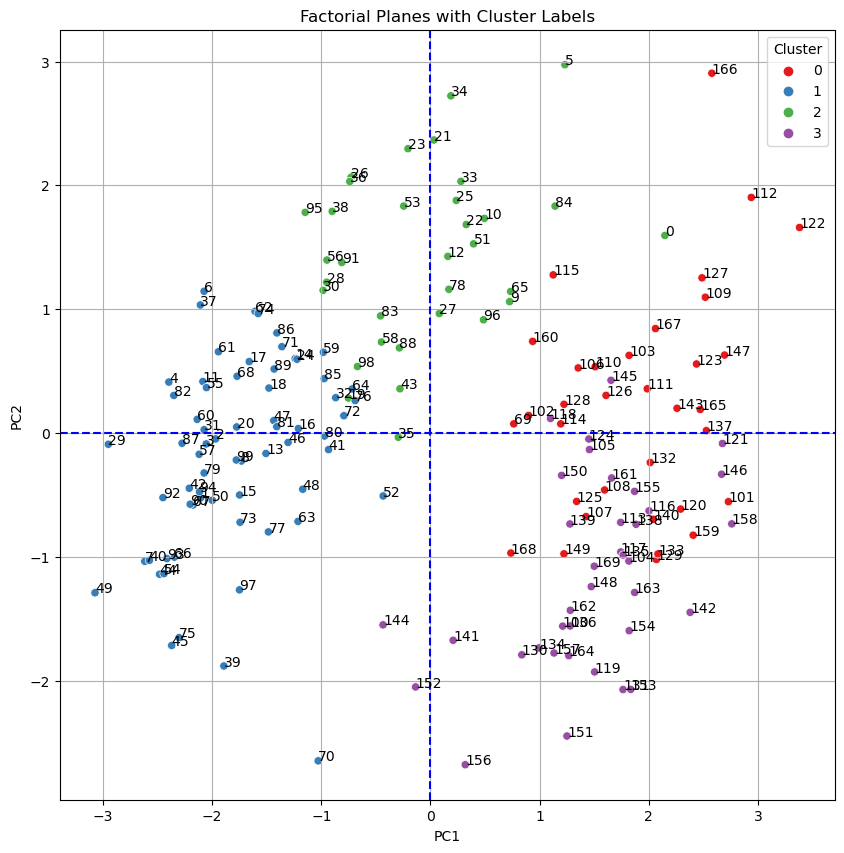

In [78]:
kmeans=KMeans(n_clusters=4, n_init=100)
kmeans.fit(projected_df)

cluster_labels=kmeans.labels_

factorial_planes=pd.DataFrame(projected_df[:, :2], columns=['PC1', 'PC2'])
factorial_planes['Cluster']=cluster_labels

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=factorial_planes, palette='Set1')

#Labeling each point with the id
for i in range(len(factorial_planes)):
    plt.annotate(i, (factorial_planes.loc[i, 'PC1'], factorial_planes.loc[i, 'PC2']))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Factorial Planes with Cluster Labels')
plt.axhline(y=0, color='b', linestyle='--', linewidth=1.5)
plt.axvline(x=0, color='b', linestyle='--', linewidth=1.5)
plt.grid(True)
plt.show()

In [79]:
#Confusion matrix
merged_df=pd.concat([df, factorial_planes], axis=1)
merged_df.head()
cluster_count = merged_df.pivot_table(index='is_genuine', columns='Cluster', aggfunc='size', fill_value=0)
cluster_count

Cluster,0,1,2,3
is_genuine,,,,
0,33,0,0,37
1,1,66,33,0


In [80]:
#Checking accuracy of the classification
check_acc=(37+66+33+33)/170
check_acc

0.9941176470588236

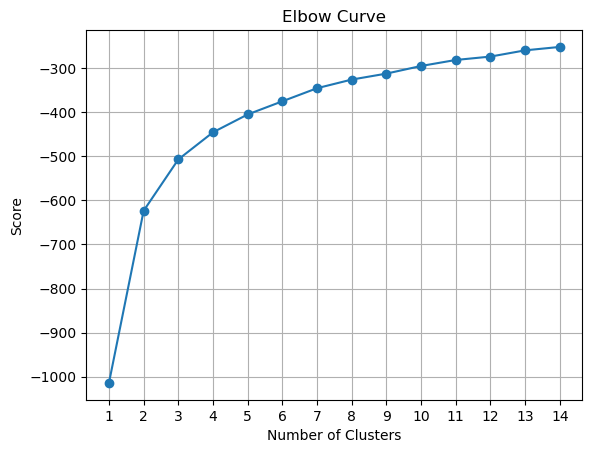

In [81]:
#Elbow curve to help decide the number of clusters
num_clusters=15
kmeans_tests=[KMeans(n_clusters=i, init='random', n_init=20) for i in range(1, num_clusters)]
score=[kmeans_tests[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans_tests))]


plt.plot(range(1, num_clusters),score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(np.arange(1,num_clusters))
plt.grid(True)
plt.show()

# Task 4 - Model the data

In [82]:
#First model
df['is_genuine']=df['is_genuine'].astype(int) 
model=smf.logit('is_genuine ~ diagonal + length', data=df)
results=model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.182698
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.7303
Time:                        11:04:05   Log-Likelihood:                -31.059
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 2.945e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -794.0488    227.821     -3.485      0.000   -1240.570    -347.528
diagonal       1.3610      1

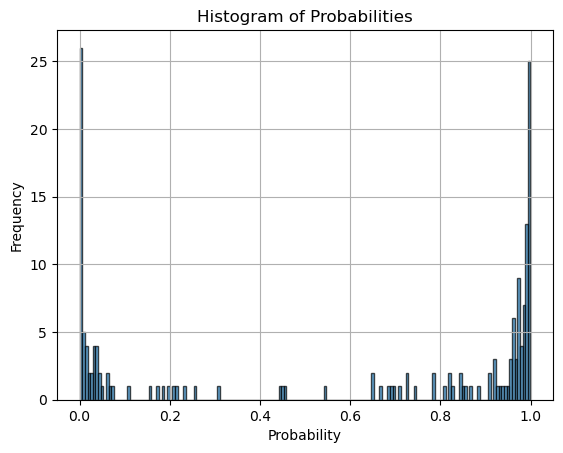

In [83]:
proba=1/(1+np.exp(-results.fittedvalues))
plt.hist(proba, bins=170, edgecolor='black', alpha=0.7)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.grid(True)
plt.show()

In [84]:
#The class that the model predicts for each individual
yhat=results.predict(df[['diagonal','length']])
threshold = 0.5
#Transforming the list of booleans into an int with 1 = True, 0 = False
predicted_class = (yhat > threshold).astype(int)
predicted_class.value_counts()

1    103
0     67
dtype: int64

In [85]:
#Confusion matrix of the predictions
results.pred_table()

array([[64.,  6.],
       [ 3., 97.]])

In [86]:
#Accuracy of the model
accuracy=(64+97)/170
accuracy

0.9470588235294117

Optimization terminated successfully.
         Current function value: 0.174318
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.7427
Time:                        11:05:31   Log-Likelihood:                -29.634
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 7.086e-38
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -264.8995    151.841     -1.745      0.081    -562.503      32.704
length          4.6176    

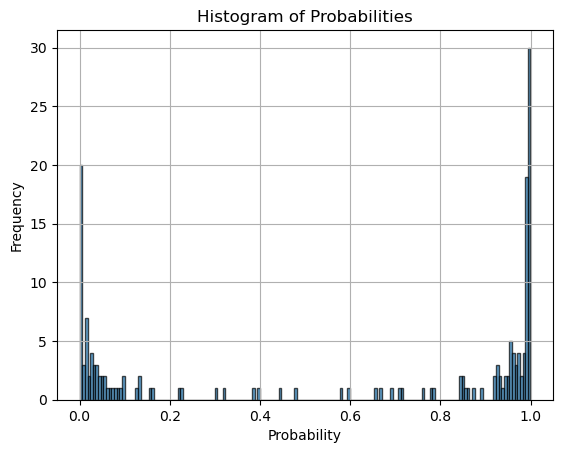

1    101
0     69
dtype: int64
[[65.  5.]
 [ 4. 96.]]


In [87]:
#Second model
model2=smf.logit('is_genuine ~ length + height_left', data=df)
results2=model2.fit()
print(results2.summary())
proba2=1/(1+np.exp(-results2.fittedvalues))
plt.hist(proba2, bins=170, edgecolor='black', alpha=0.7)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.grid(True)
plt.show()
yhat2=results2.predict(df[['length','height_left']])
threshold = 0.5
predicted_class2 = (yhat2 > threshold).astype(int)
print(predicted_class2.value_counts())
print(results2.pred_table())

Optimization terminated successfully.
         Current function value: 0.155860
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.7699
Time:                        11:05:39   Log-Likelihood:                -26.496
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 3.074e-39
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -99.0272    159.152     -0.622      0.534    -410.959     212.905
length           4.2817

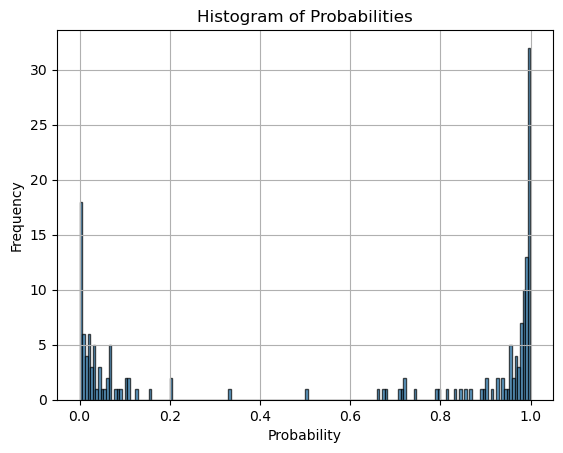

1    103
0     67
dtype: int64
[[64.  6.]
 [ 3. 97.]]


In [88]:
#Third model
model3=smf.logit('is_genuine ~ length + height_right', data=df)
results3=model3.fit()
print(results3.summary())
proba3=1/(1+np.exp(-results3.fittedvalues))
plt.hist(proba3, bins=170, edgecolor='black', alpha=0.7)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.grid(True)
plt.show()
yhat3=results3.predict(df[['length','height_right']])
threshold = 0.5
predicted_class3 = (yhat3 > threshold).astype(int)
print(predicted_class3.value_counts())
print(results3.pred_table())

D:\anaconda\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.449388
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.3367
Time:                        11:05:48   Log-Likelihood:                -76.396
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.442e-17
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      142.5119    123.216      1.157      0.247     -98.987     384.011
diagonal         2.6768

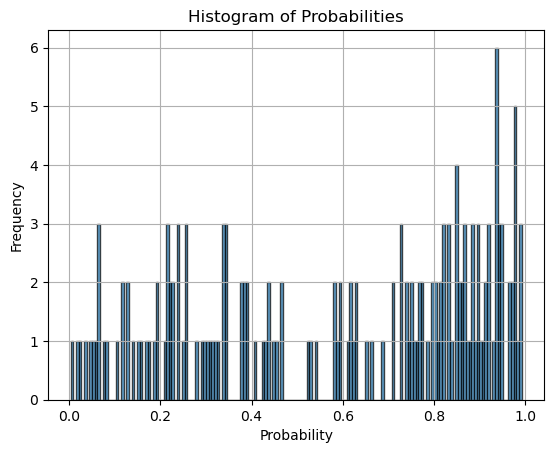

1    101
0     69
dtype: int64
[[53. 17.]
 [16. 84.]]


In [89]:
#Fourth model
model4=smf.logit('is_genuine ~ diagonal + height_right', data=df)
results4=model4.fit(max_iter=1000)
print(results4.summary())
proba4=1/(1+np.exp(-results4.fittedvalues))
plt.hist(proba4, bins=170, edgecolor='black', alpha=0.7)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.grid(True)
plt.show()
yhat4=results4.predict(df[['diagonal', 'height_right',]])
threshold = 0.5
predicted_class4 = (yhat4 > threshold).astype(int)
print(predicted_class4.value_counts())
print(results4.pred_table())

# Optimal model

D:\anaconda\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.140145
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.7931
Time:                        11:05:59   Log-Likelihood:                -23.825
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 2.305e-39
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -515.5627    258.261     -1.996      0.046   -1021.744      -9.381
length           4.246

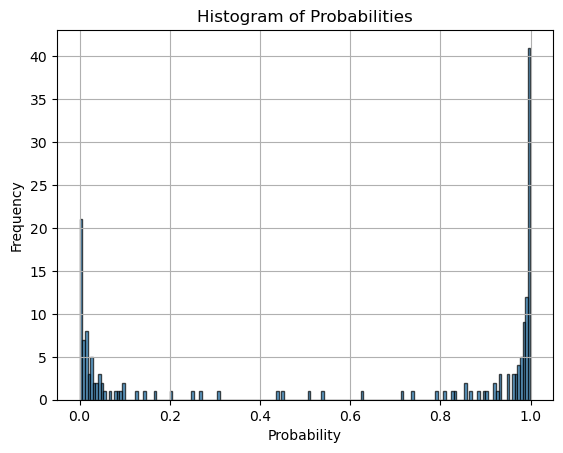

1    101
0     69
dtype: int64
[[66.  4.]
 [ 3. 97.]]


In [90]:
#Fifth model
model5=smf.logit('is_genuine ~ length + height_right + diagonal', data=df)
results5=model5.fit(max_iter=1000)
print(results5.summary())
proba5=1/(1+np.exp(-results5.fittedvalues))
plt.hist(proba5, bins=170, edgecolor='black', alpha=0.7)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.grid(True)
plt.show()
yhat5=results5.predict(df[['length', 'height_right', 'diagonal']])
threshold = 0.5
predicted_class5 = (yhat5 > threshold).astype(int)
print(predicted_class5.value_counts())
print(results5.pred_table())

# Predictions

In [92]:
#Testing our program with an unknown example
exampledf = pd.read_csv(r"C:\Users\blago\OneDrive\Documents\Openclassrooms\Project 7\example.csv")

exampledf_subset = exampledf[['length','height_right','diagonal']]
ypred = results5.predict(exampledf_subset)

threshold = 0.5
predicted_classes = (ypred > threshold).astype(int)

exampledf['Predicted_Probability'] = ypred
exampledf['Predicted_Class'] = predicted_classes

exampledf

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Predicted_Probability,Predicted_Class
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.058609,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.090267,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.007666,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.964362,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.992699,1


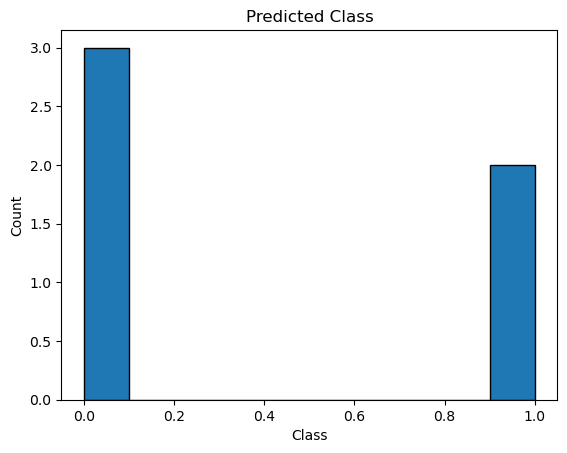

In [94]:
plt.hist(exampledf['Predicted_Class'], bins=10, edgecolor='black', density=False)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Predicted Class')
plt.show()